***
***

# Introduction to Neural Network


***
***

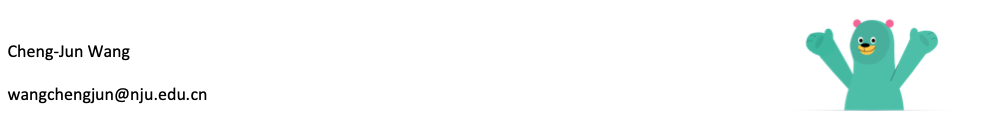

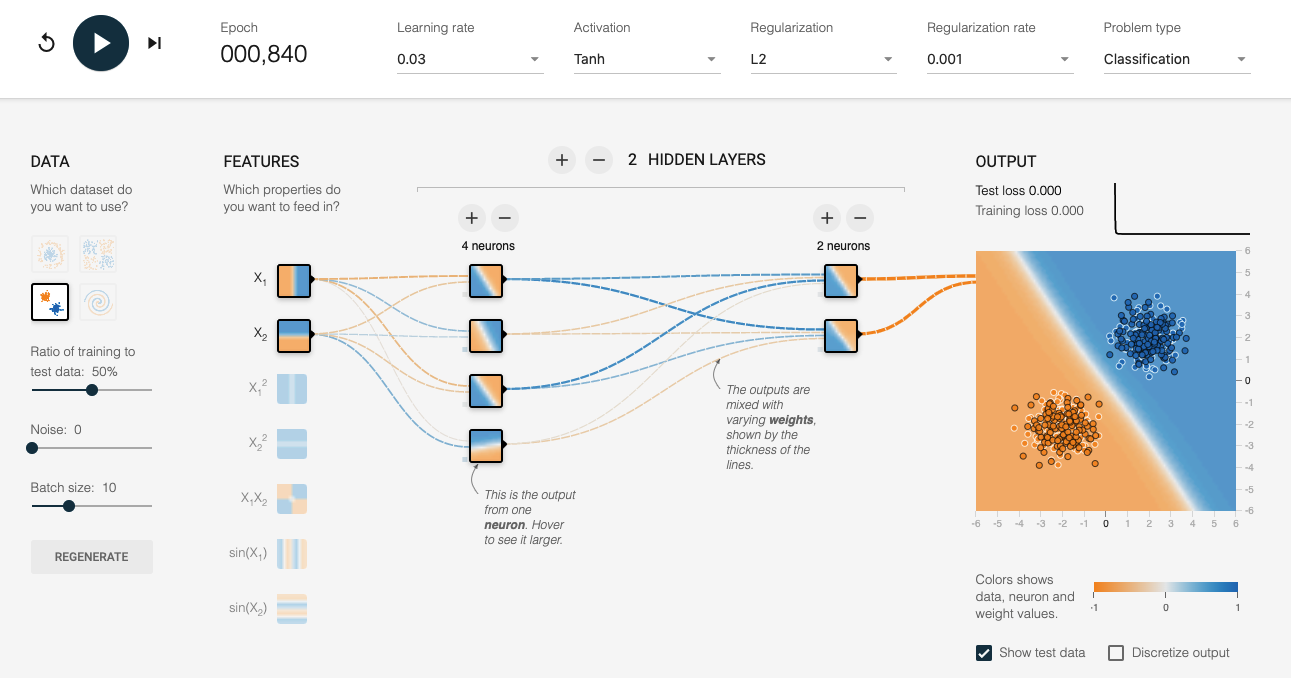

http://playground.tensorflow.org/

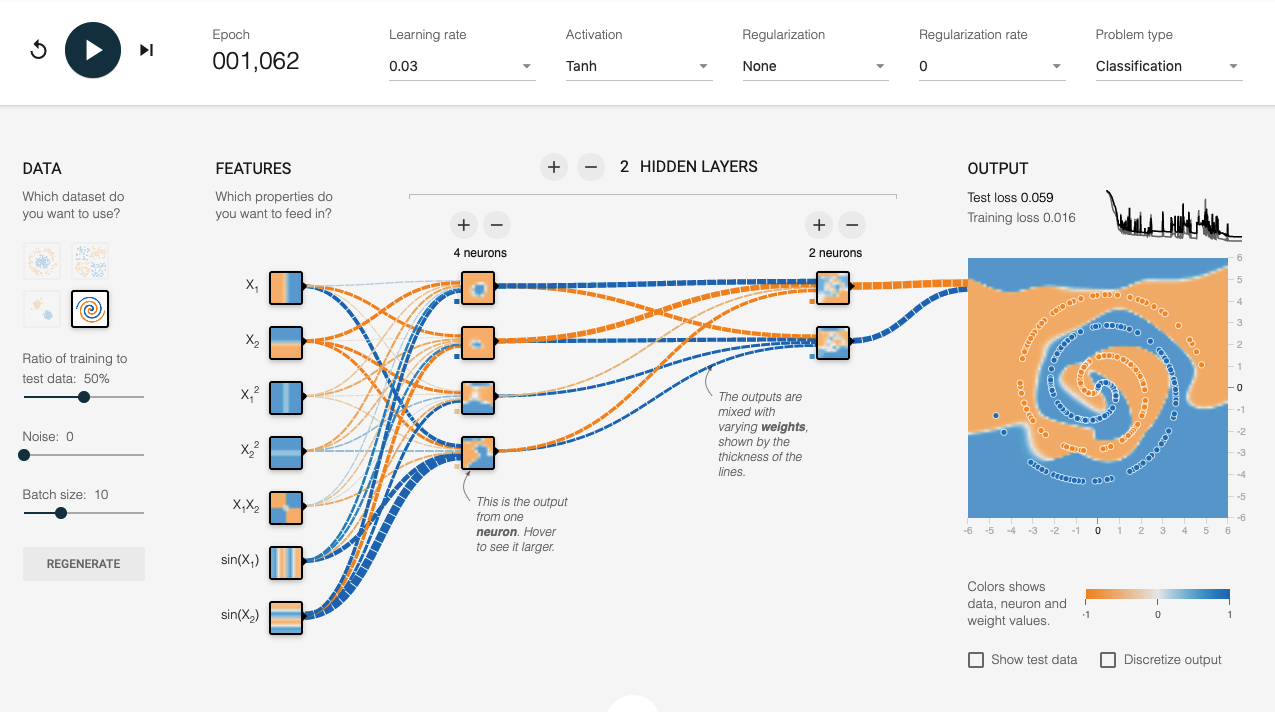

### Batch, Iteration, & Epoch

Batch Size is the total number of training examples present in a single batch.

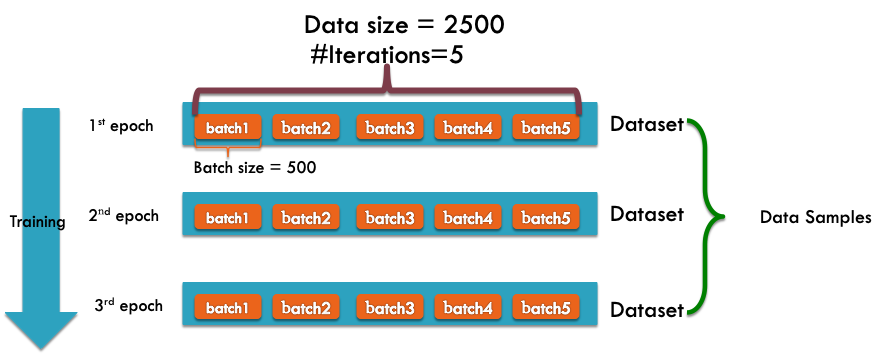


Note: The number of batches is equal to number of iterations for one epoch. Batch size and number of batches (iterations) are two different things.


Let’s say we have 2000 training examples that we are going to use .

We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

Where Batch Size is 500 and Iterations is 4, for 1 complete epoch.

### Gradient Descent

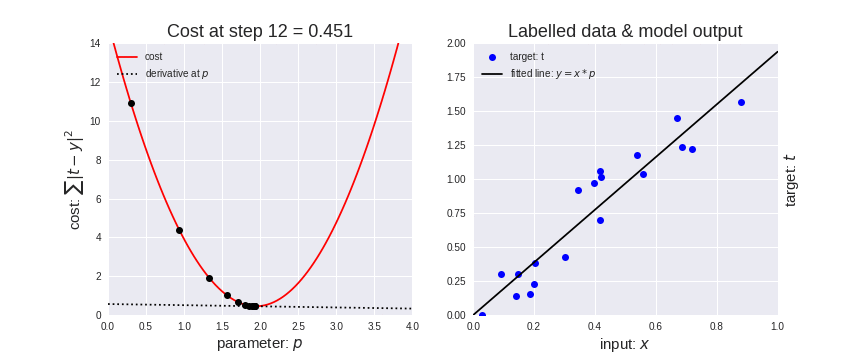

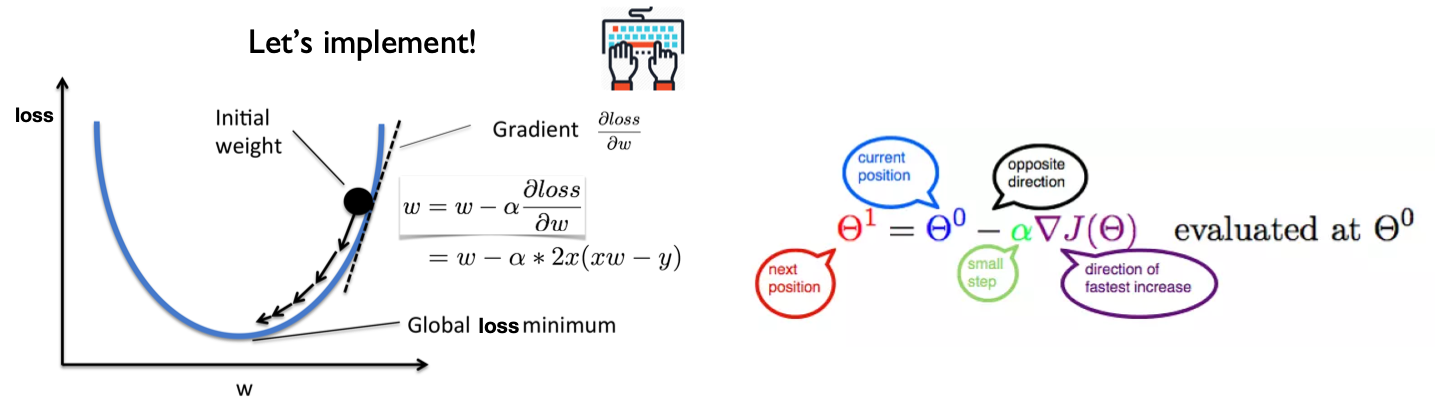

Let's represent parameters as $\Theta$, learning rate as $\alpha$, and gradient as $\bigtriangledown J(\Theta)$, 

To find the minimum of the function $f(x) = 3x^2 + 2x,$ with derivative $f'(x) = 6x + 2.$

Solving for $6x = 0$ and evaluation of the second derivative at the solutions shows the function has  a global minimum at $x = -\frac{1}{3}.$

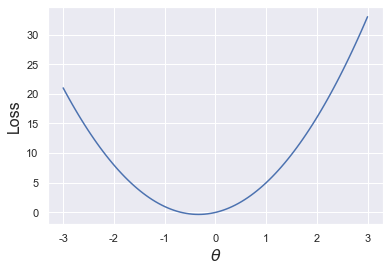

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

theta = np.linspace(-3, 3, 100)
loss = 3*theta**2 +2*theta
plt.plot(theta, loss)
plt.xlabel(r'$\theta$', fontsize = 16)
plt.ylabel('Loss', fontsize = 16);

In [65]:
next_theta = 2  # We start the search at x=2
gamma = 0.1     # learning rate
precision = 0.00001  # Desired precision of result
max_iters = 10000    # Maximum number of iterations

# Derivative function
def df(x):
    return 6*x+2


for _ in theta:
    current_theta = next_theta
    next_theta = current_theta - gamma * df(current_theta)

    step = next_theta - current_theta
    if abs(step) <= precision:
        break

print("Minimum at ", next_theta)

Minimum at  -0.33332706983936


### Activation Function


In [75]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

sigmoid(0.5)

0.6224593312018546

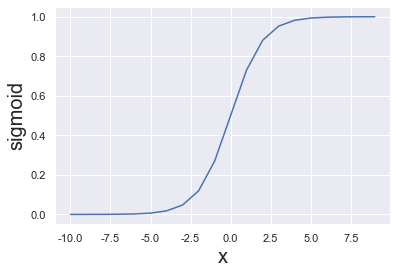

In [76]:
plt.plot(range(-10, 10), [sigmoid(i) for i in range(-10, 10)])
plt.xlabel('x', fontsize = 20)
plt.ylabel('sigmoid', fontsize = 20);

In [77]:
# Naive scalar relu implementation. 
# In the real world, most calculations are done on vectors
def relu(x):
    if x < 0:
        return 0
    else:
        return x

relu(0.5)

0.5

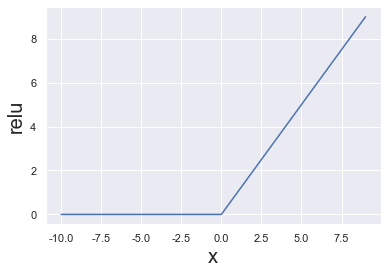

In [78]:
plt.plot(range(-10, 10), [relu(i) for i in range(-10, 10)])
plt.xlabel('x', fontsize = 20)
plt.ylabel('relu', fontsize = 20);

## House Price

Let’s start with a simple example. 
- Say you’re helping a friend who wants to buy a house.

- She was quoted $400,000 for a 2000 sq ft house (185 meters). 

Is this a good price or not?

So you ask your friends who have bought houses in that same neighborhoods, and you end up with three data points:



| Area (sq ft) (x)  |  Price (y)   |  
| -------------|:-------------:|
|2,104|399,900|
|1,600|329,900|
|2,400|369,000|


$$y = f(X) = W X$$

- Calculating the prediction is simple multiplication.
- But before that, we need to think about the weight we’ll be multiplying by. 
- “training” a neural network just means finding the weights we use to calculate the prediction.


A simple predictive model (“regression model”)
- takes an input, 
- does a calculation, 
- and gives an output 



<img src= 'img/neuralnetwork/data_points_graph_animated.gif' width= "700px">

Model Evaluation
- If we apply our model to the three data points we have, how good of a job would it do?


<img src= 'img/neuralnetwork/data_points_error_animated.gif' width= "700px">


<img src= 'img/neuralnetwork/model_evaluation.png' width= "500px">

**Loss Function ** -- how bad our prediction is

- For each point, the error is measured by the difference between the **actual value** and the **predicted value**, raised to the power of 2. 
- This is called **Mean Square Error**. 


<img src= 'img/neuralnetwork/lines_and_errors_animated.gif' width= "700px">

- We can't improve much on the model by varying the weight any more. 
- But if we add a bias (intercept) we can find values that improve the model.

<img src= 'img/neuralnetwork/NNs_bias_2.png' width= "500px">

$$y = 0.1 X + 150$$

**Gradient Descent**

- Automatically get the correct weight and bias values 
- minimize the loss function.

<img src= 'img/neuralnetwork/gd.png' width= "700px">



### Regression

<img src= 'img/neuralnetwork/NNs_2_variables.png' width= "500px">



### Classification

<img src= 'img/neuralnetwork/softmax-regression-scalargraph.png' width= "500px">



### softmax

The softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. 

$$softmax = \frac{e^x}{\sum e^x}$$


In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np

In [79]:
def softmax(s):
    return np.exp(s) / np.sum(np.exp(s), axis=0)

softmax([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

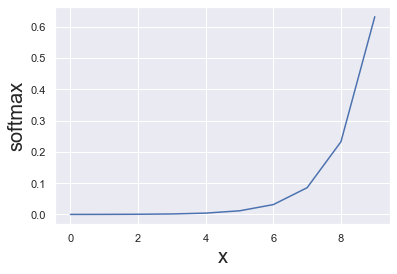

In [80]:
plt.plot(range(10), softmax(range(10)))
plt.xlabel('x', fontsize = 20)
plt.ylabel('softmax', fontsize = 20);


That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. 

Furthermore, the larger input components will correspond to larger probabilities. 

Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.

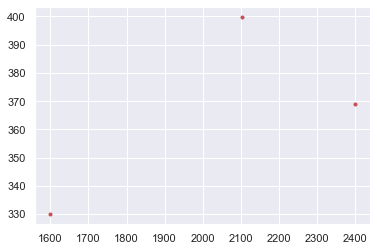

In [67]:
x_train = np.array([[2104],[1600],[2400]], dtype=np.float32)
y_train = np.array([[399.900], [329.900], [369.000]], dtype=np.float32)

plt.plot(x_train, y_train, 'r.')
plt.show()

In [69]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

**nn.Linear**

> help(nn.Linear)

Applies a linear transformation to the incoming data: $y = xA^T + b$

- **in_features**: size of each input sample
- **out_features**: size of each output sample
- **bias**: If set to False, the layer will not learn an additive bias. Default: ``True``

In [70]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression()

In [71]:
# Define Loss and Optimizatioin function
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-9)#1e-4)

> help(nn.MSELoss)

To measures the **mean squared error** (squared L2 norm) between each element in the input `x` and target `y`.

> help(optim.SGD)

Implements **stochastic gradient descent** (optionally with momentum).

In [72]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train) 
    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad() # Clears the gradients of all optimized
    loss.backward()
    optimizer.step() # Performs a single optimization step.

    if (epoch+1) % 50 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data.item()))


Epoch[50/1000], loss: 524703.812500
Epoch[100/1000], loss: 224658.125000
Epoch[150/1000], loss: 96851.820312
Epoch[200/1000], loss: 42411.964844
Epoch[250/1000], loss: 19222.966797
Epoch[300/1000], loss: 9345.485352
Epoch[350/1000], loss: 5138.111816
Epoch[400/1000], loss: 3345.956299
Epoch[450/1000], loss: 2582.575439
Epoch[500/1000], loss: 2257.412354
Epoch[550/1000], loss: 2118.905518
Epoch[600/1000], loss: 2059.905518
Epoch[650/1000], loss: 2034.777222
Epoch[700/1000], loss: 2024.072266
Epoch[750/1000], loss: 2019.512207
Epoch[800/1000], loss: 2017.569946
Epoch[850/1000], loss: 2016.742554
Epoch[900/1000], loss: 2016.390259
Epoch[950/1000], loss: 2016.241577
Epoch[1000/1000], loss: 2016.177734


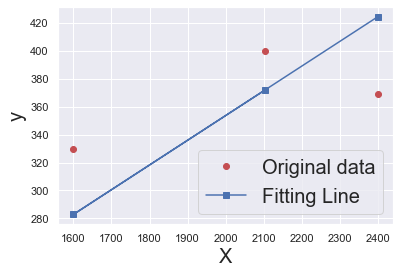

In [73]:
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, 'b-s', label='Fitting Line')
plt.xlabel('X', fontsize= 20)
plt.ylabel('y', fontsize= 20)
plt.legend( fontsize= 20)
plt.show()

## Have a try

In [74]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)



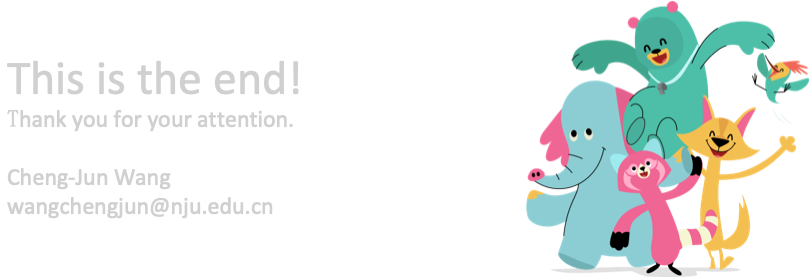

<!--NAVIGATION-->
< [In-Depth: Decision Trees and Random Forests](09.08-Random-Forests.ipynb) | [Contents](Index.ipynb) |[In-Depth: Neural Network Advanced](09.10.neural_network_advanced.ipynb)>